In [3]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import datetime

import statsmodels.api as sm  

from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [4]:
df = pd.read_csv('cur.linz.autobahnbruecke.traffic.risc-software.at.csv', parse_dates=[0], index_col=0)

In [5]:
df.columns

Index([u'delay', u'average_speed', u'delayed_average_speed', u'total_distance',
       u'total_duration', u'total_duration_in_traffic', u'day', u'dow', u'hod',
       u'working_day'],
      dtype='object')

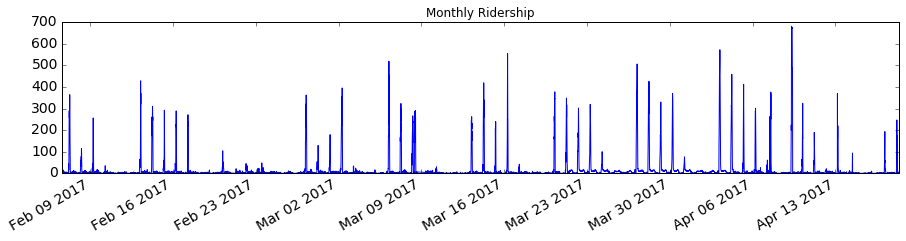

In [6]:
df.delay.plot(figsize=(15,3), title= 'Monthly Ridership', fontsize=14)

In [7]:
df.index

DatetimeIndex(['2017-02-06 14:40:00', '2017-02-06 14:50:00',
               '2017-02-06 15:00:00', '2017-02-06 15:10:00',
               '2017-02-06 15:20:00', '2017-02-06 15:30:00',
               '2017-02-06 15:40:00', '2017-02-06 15:50:00',
               '2017-02-06 16:00:00', '2017-02-06 16:10:00',
               ...
               '2017-04-18 07:00:00', '2017-04-18 07:10:00',
               '2017-04-18 07:20:00', '2017-04-18 07:30:00',
               '2017-04-18 07:40:00', '2017-04-18 07:50:00',
               '2017-04-18 08:00:00', '2017-04-18 08:10:00',
               '2017-04-18 08:20:00', '2017-04-18 08:30:00'],
              dtype='datetime64[ns]', length=10000, freq=None)

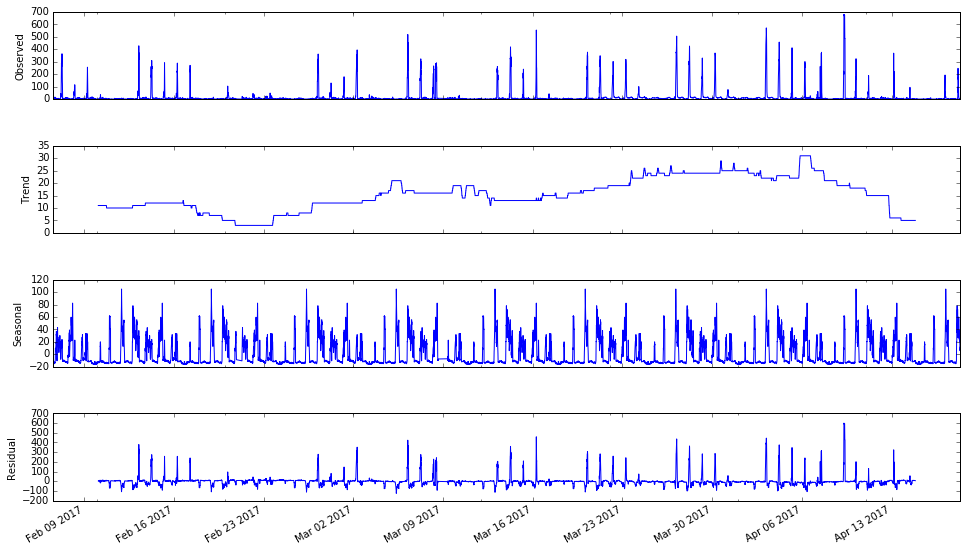

In [8]:
decomposition = seasonal_decompose(df.delay['2017-02-06':], freq=1008)  
fig = plt.figure() 
fig = decomposition.plot()  
fig.set_size_inches(15, 9)

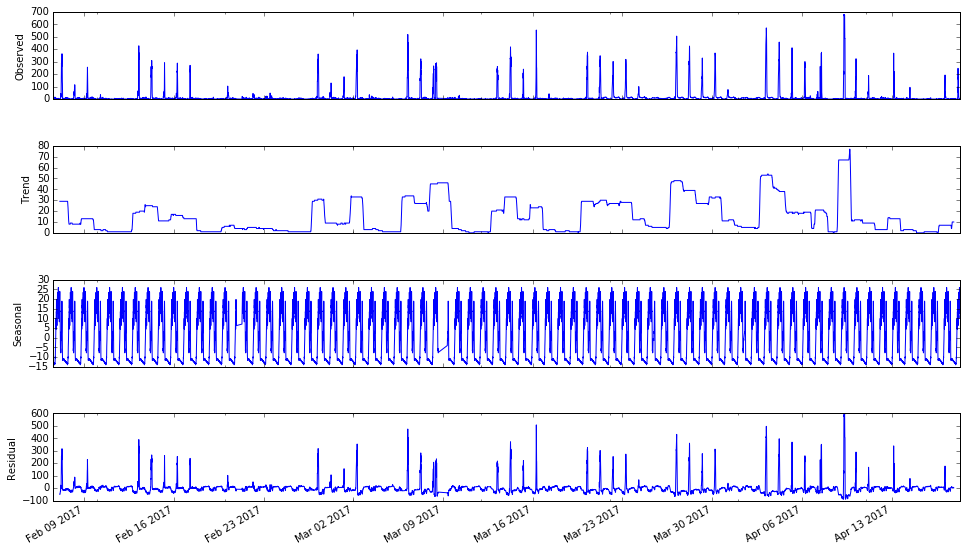

In [9]:
decomposition = seasonal_decompose(df.delay,model='additive', freq=144)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 9)

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 3))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

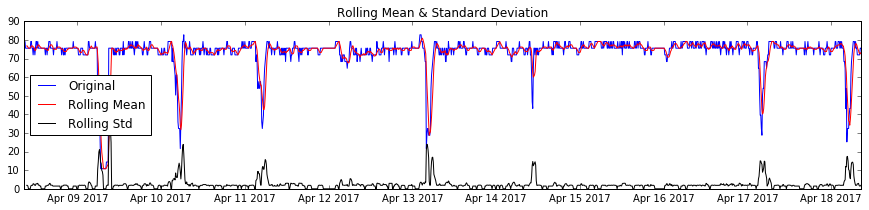

Results of Dickey-Fuller Test:
Test Statistic                -9.266487e+00
p-value                        1.362584e-15
#Lags Used                     5.000000e+00
Number of Observations Used    1.434000e+03
Critical Value (5%)           -2.863558e+00
Critical Value (1%)           -3.434918e+00
Critical Value (10%)          -2.567844e+00
dtype: float64


In [11]:
test_stationarity(df.delayed_average_speed[-1440:])

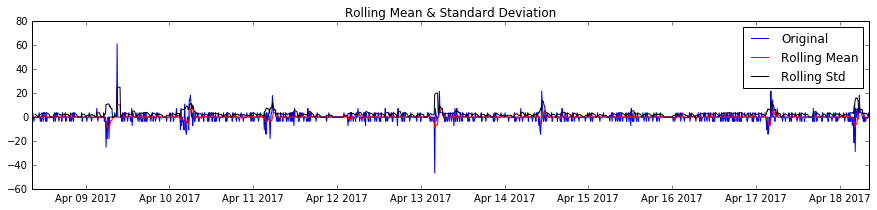

Results of Dickey-Fuller Test:
Test Statistic                -1.293307e+01
p-value                        3.665892e-24
#Lags Used                     1.800000e+01
Number of Observations Used    1.421000e+03
Critical Value (5%)           -2.863576e+00
Critical Value (1%)           -3.434960e+00
Critical Value (10%)          -2.567854e+00
dtype: float64


In [12]:
df['seasonal_diff_1'] = df.delayed_average_speed - df.delayed_average_speed.shift(1)
test_stationarity(df.seasonal_diff_1[-1440:])

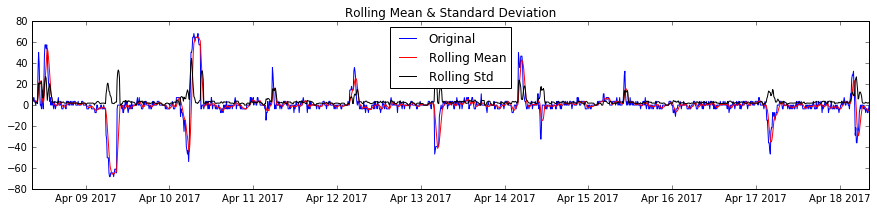

Results of Dickey-Fuller Test:
Test Statistic                -6.403785e+00
p-value                        1.965961e-08
#Lags Used                     1.900000e+01
Number of Observations Used    1.420000e+03
Critical Value (5%)           -2.863578e+00
Critical Value (1%)           -3.434963e+00
Critical Value (10%)          -2.567855e+00
dtype: float64


In [13]:
df['seasonal_diff_day'] = df.delayed_average_speed - df.delayed_average_speed.shift(144)  
test_stationarity(df.seasonal_diff_day[-1440:])

In [45]:
df['tod' ] = df.index.time
df.columns

Index([u'delay', u'average_speed', u'delayed_average_speed', u'total_distance',
       u'total_duration', u'total_duration_in_traffic', u'day', u'dow', u'hod',
       u'working_day', u'seasonal_diff_1', u'seasonal_diff_day', u'tod'],
      dtype='object')

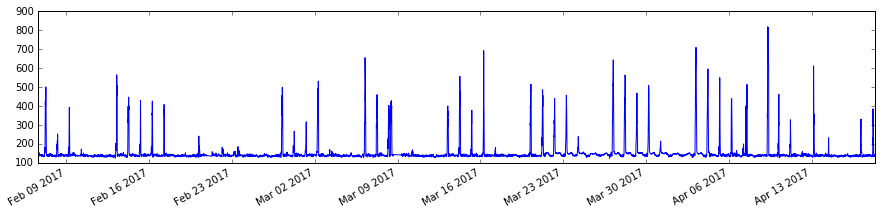

In [47]:
df.total_duration_in_traffic.plot(figsize=(15,3))

In [62]:
yhat = np.sin(144*np.arange(df.shape[0]))**2
print yhat.shape

print len(range(df.shape[0]))

(10000,)
10000


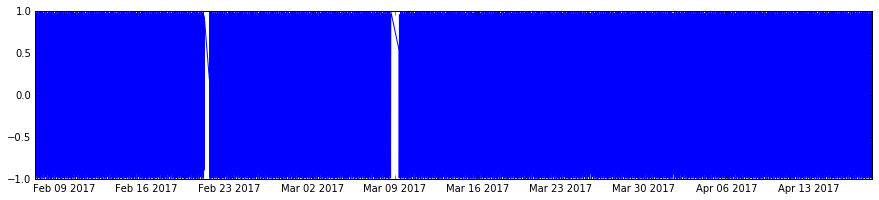

In [67]:
plt.figure(figsize=(15,3))
plt.plot(df.index, np.cos(np.arange(df.shape[0])) )